<blockquote>
    <h1>Exercise 3.11</h1>
    <p>
        In this problem we will investigate the $t$-statistic for the null hypothesis $H_0 : \beta = 0$ in simple linear regression without an intercept. To begin, we generate a predictor $x$ and a response $y$ as follows.</p>
        <code>set.seed(1)
x=rnorm(100)
y=2*x*rnorm(100)</code>    
    <ol>
        <li>Perform a simple linear regression of $y$ onto $x$, <i>without</i> an intercept. Report the coefficient estimate $\hat{\beta}$, the standard error of this coefficient estimate, and the $t$-statistic and $p$-value associated with the null hypothesis $H_0:\beta = 0$. Comment on these results. (You can perform regression without an intercept using the command <code>lm(y~x+0)</code>.)</li>
        <li>Now perform a simple linear regression of $x$ onto $y$ without an intercept, and report the coefficient estimate, its standard error, and the corresponding $t$-statistic and $p$-values associated with the null hypothesis $H_0:\beta = 0$. Comment on these results.</li>
        <li>What is the relationship between the results obtained in 1 and 2?</li>
        <li>For the regression of $Y$ onto $X$ without an intercept, the $t$-statistic for $H_0:\beta = 0$ takes the form $\hat{\beta} / \mathrm{SE}(\hat{\beta})$, where $\hat{\beta}$ is given by [equation] (3.38), and where
        $$
            \mathrm{SE}(\hat{\beta}) = \sqrt{\frac{\sum_{i=1}^n \left(y_i - x_i \hat{\beta}\right)^2}{(n-1)\sum_{i'=1}^n x_{i'}^2}} \,.
        $$
        (These formulas are slightly different from those given in Sections 3.1.1 and 3.1.2, since here we are performing regression without an intercept.) Show algebraically, and confirm numerically in R , that the $t$-statistic can be written as
        $$
            \frac{ (\sqrt{n-1}) \sum_{i=1}^n x_i y_i }{ \sqrt{ (\sum_{i=1}^n x_i^2) (\sum_{i'=1}^n y_{i'}^2) - (\sum_{i'=1}^n x_{i'} y_{i'})^2 } } \,.
        $$</li>
        <li>Using the results from 4, argue that the $t$-statistic for the regression of $y$ onto $x$ is the same as the $t$-statistic for the regression of $x$ onto $y$.</li>
        <li>In R, show that when regression is performed <i>with</i> an intercept, the $t$-statistic for $H_0:\beta_1 = 0$ is the same for the regression of $y$ onto $x$ as it is for the regression of $x$ onto $y$.</li>
    </ol>
</blockquote>

In [1]:
import pandas as pd
import numpy as np
import numpy.testing as npt
import matplotlib.pyplot as plt

%run ../../customModules/usefulFunctions.ipynb
# https://stackoverflow.com/questions/34398054/ipython-notebook-cell-multiple-outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import statsmodels.api as sm

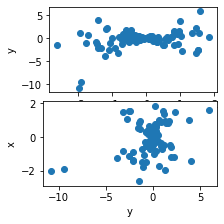

In [2]:
np.random.seed(42)
x_np = np.random.normal(size=100, loc=0, scale=1)
y_np = 2 * x_np * np.random.normal(size=100, loc=0, scale=1)
x = pd.DataFrame({'x': x_np})
y = pd.DataFrame({'y': y_np})
fig = plt.figure(constrained_layout=True, figsize=(3, 3))
ax1 = fig.add_subplot(211)
_ = ax1.scatter(x, y)
_ = ax1.set_xlabel('x')
_ = ax1.set_ylabel('y')
ax2 = fig.add_subplot(212)
_ = ax2.scatter(y, x)
_ = ax2.set_xlabel('y')
_ = ax2.set_ylabel('x')


<h3>Exercise 3.11.1</h3>
<blockquote>
    <i>Perform a simple linear regression of $y$ onto $x$, <i>without</i> an intercept. Report the coefficient estimate $\hat{\beta}$, the standard error of this coefficient estimate, and the $t$-statistic and $p$-value associated with the null hypothesis $H_0:\beta = 0$. Comment on these results. (You can perform regression without an intercept using the command <code>lm(y~x+0)</code>.)</i>
</blockquote>


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.095
Model:                            OLS   Adj. R-squared (uncentered):              0.086
Method:                 Least Squares   F-statistic:                              10.43
Date:                Tue, 31 Dec 2019   Prob (F-statistic):                     0.00168
Time:                        10:14:45   Log-Likelihood:                         -207.42
No. Observations:                 100   AIC:                                      416.8
Df Residuals:                      99   BIC:                                      419.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              0.6873      0.213      3.230      0.002       0.265       1.110
==============================================================================
Omnibus:                       51.437   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              265.270
Skew:                          -1.559   Prob(JB):                     2.50e-58
Kurtosis:                      10.344   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

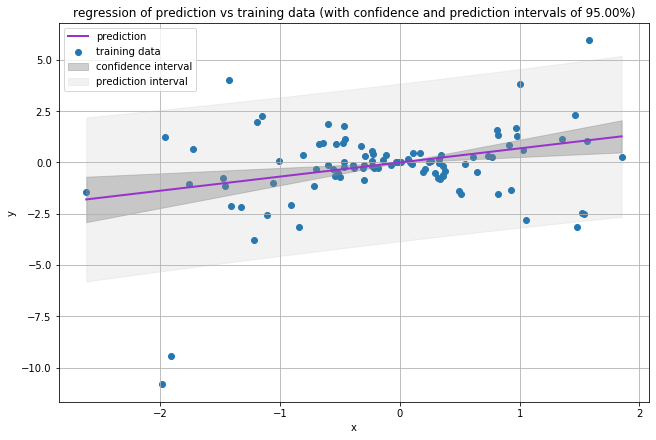

In [3]:
model = sm.OLS(y, x)
fitted = model.fit()
coef_result1 = fitted.params[0] # store the value of the slope coefficient for later use
t_stat_result1 = fitted.tvalues[0]  # store the value t-statistic for later use
fitted.summary()
createSimpleLinearRegressionPlot(X=x, Y=y, fitted_model=fitted, independent='x', dependent='y')

<p>The estimation of the coefficient $\hat{\beta}$ is $0.69$, with an estimated standard error of $0.21$, a $t$-statistic of $3.23$ and a $p$ value of $0.2 \%$. This indicates that there is a significant relation between $x$ and $y$.</p>

<h3>Exercise 3.11.2</h3>
<blockquote>
    <i>Now perform a simple linear regression of $x$ onto $y$ without an intercept, and report the coefficient estimate, its standard error, and the corresponding $t$-statistic and $p$-values associated with the null hypothesis $H_0:\beta = 0$. Comment on these results.</i>
</blockquote>

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      x   R-squared (uncentered):                   0.095
Model:                            OLS   Adj. R-squared (uncentered):              0.086
Method:                 Least Squares   F-statistic:                              10.43
Date:                Tue, 31 Dec 2019   Prob (F-statistic):                     0.00168
Time:                        10:14:45   Log-Likelihood:                         -127.40
No. Observations:                 100   AIC:                                      256.8
Df Residuals:                      99   BIC:                                      259.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
y              0.1387      0.043      3.230      0.002       0.054       0.224
==============================================================================
Omnibus:                        0.638   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.727   Jarque-Bera (JB):                0.252
Skew:                          -0.062   Prob(JB):                        0.882
Kurtosis:                       3.212   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

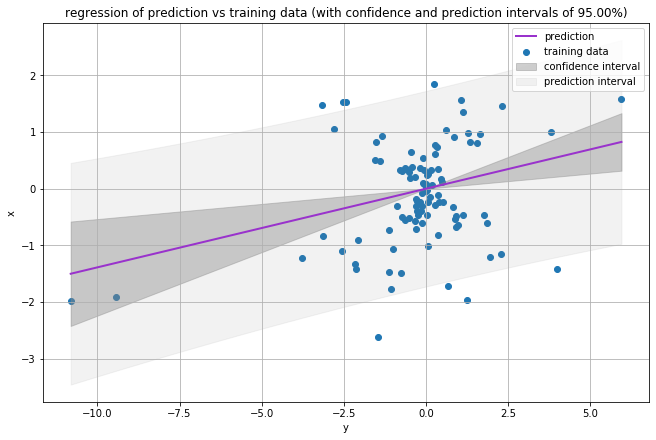

In [4]:
model = sm.OLS(x, y)
fitted = model.fit()
t_stat_result2 = fitted.tvalues[0]  # store the value t-statistic for later use
fitted.summary()
createSimpleLinearRegressionPlot(X=y, Y=x, fitted_model=fitted, independent='y', dependent='x')

<p>The estimation of the coefficient $\hat{\beta}$ is $0.14$, with an estimated standard error of $0.04$, a $t$-statistic of $3.23$ and a $p$ value of $0.2 \%$. This again indicates that there is a significant relation between $x$ and $y$.</p>

<h3>Exercise 3.11.3</h3>
<blockquote>
    <i>What is the relationship between the results obtained in 1 and 2?</i>
</blockquote>

<p>For result 1 we have assumed
$$
y_i = \hat{\beta} * x_i + e_i  \,,
$$which can be rewritten as
$$
x_i = \frac{1}{\hat{\beta}} y_i-\frac{e_i}{\hat{\beta}} \,.
$$
We can easily compute this calculation as a sanity check.</p>

In [5]:
error = y_np - coef_result1 * x_np
x2_np = (y_np - error) / coef_result1
difference = x_np - x2_np 

# assert that the difference vector indeed approximates a zero vector
npt.assert_almost_equal(difference, np.zeros(difference.shape), decimal=10)

<h3>Exercise 3.11.4</h3>
<blockquote>
    <i>For the regression of $Y$ onto $X$ without an intercept, the $t$-statistic for $H_0:\beta = 0$ takes the form $\hat{\beta} / \mathrm{SE}(\hat{\beta})$, where $\hat{\beta}$ is given by [equation] (3.38), and where
        $$
            \mathrm{SE}(\hat{\beta}) = \sqrt{\frac{\sum_{i=1}^n \left(y_i - x_i \hat{\beta}\right)^2}{(n-1)\sum_{i'=1}^n x_{i'}^2}} \,.
        $$
        (These formulas are slightly different from those given in Sections 3.1.1 and 3.1.2, since here we are performing regression without an intercept.) Show algebraically, and confirm numerically in R , that the $t$-statistic can be written as
        $$
            \frac{ (\sqrt{n-1}) \sum_{i=1}^n x_i y_i }{ \sqrt{ (\sum_{i=1}^n x_i^2) (\sum_{i'=1}^n y_{i'}^2) - (\sum_{i'=1}^n x_{i'} y_{i'})^2 } } \,.
        $$</i>
</blockquote>

<p>Note that equation (3.38) is given by
$$
     \hat{\beta} = \frac{\sum_{i=1}^n x_i y_i}{\sum_{i'=1}^n x_{i'}^2} \,.
$$
Thus, we can write the $t$-statistic as
\begin{equation}
    \begin{aligned}
        t & =  \frac{\sum_{i=1}^n x_i y_i}{\sum_{i=1}^n x_{i}^2} \sqrt{\frac{(n-1)\sum_{i=1}^n x_{i}^2}{\sum_{i=1}^n \left(y_i - x_i \hat{\beta}\right)^2}} \\&
          = \frac{\sqrt{n-1} \sum_{i=1}^n x_i y_i}{ \sqrt{ \sum_{i=1}^n x_i^2 \sum_{i=1}^n \left(y_i - x_i \hat{\beta}\right)^2 } } \\&
          = \frac{\sqrt{n-1} \sum_{i=1}^n x_i y_i}{ \sqrt{ \sum_{i=1}^n x_i^2 \sum_{i=1}^n \left( y_i^2 - 2 \hat{\beta} x_i y_i + \hat{\beta} x_i^2 \right) } } \\&
          = \frac{\sqrt{n-1} \sum_{i=1}^n x_i y_i}{\sqrt{ \sum_{i=1}^n x_i^2 \sum_{i=1}^n y_i^2 - \hat{\beta} \sum_{i=1}^n x_i^2 \left( 2 \sum_{i=1}^n x_i y_i - \hat{\beta} \sum_{i=1}^n x_i^2 \right) }} \,.
    \end{aligned}
\end{equation}
Now, using the estimate for $\hat{\beta}$ given by equation (3.38) to further simply the expression for the $t$-statistic
\begin{equation}
    \begin{aligned}
        t & = \frac{\sqrt{n-1} \sum_{i=1}^n x_i y_i}{\sqrt{ \sum_{i=1}^n x_i^2 \sum_{i=1}^n y_i^2 - \sum_{i=1}^n x_i y_i \left( 2 \sum_{i=1}^n x_i y_i - \sum_{i=1}^n x_i y_i \right) }} \\&
          = \frac{ (\sqrt{n-1}) \sum_{i=1}^n x_i y_i }{ \sqrt{ (\sum_{i=1}^n x_i^2) (\sum_{i'=1}^n y_{i'}^2) - (\sum_{i'=1}^n x_{i'} y_{i'})^2 } } \,.
    \end{aligned}
\end{equation}
as required. We will now also confirm this equation using Python.</p>

In [6]:
n = x_np.shape[0]
t = ( (n-1)**0.5 * np.sum(x_np*y_np) ) / ( np.sum(x_np**2) * np.sum(y_np**2) - (np.sum(x_np*y_np))**2  )**0.5
# assert that this result is equal to the t-statistics computer for the above two regressions
assert abs(t - t_stat_result1) <= 1e-10
assert abs(t - t_stat_result2) <= 1e-10

<h3>Exercise 3.11.5</h3>
<blockquote>
    <i>Using the results from 4, argue that the $t$-statistic for the regression of $y$ onto $x$ is the same as the $t$-statistic for the regression of $x$ onto $y$.</i>
</blockquote>

<p>We can clearly see from the formula of the $t$-statistic that it is a symmetric function of the $x_i$ and $y_i$ variables.</p>

<h3>Exercise 3.11.6</h3>
<blockquote>
    <i>In R, show that when regression is performed <i>with</i> an intercept, the $t$-statistic for $H_0:\beta_1 = 0$ is the same for the regression of $y$ onto $x$ as it is for the regression of $x$ onto $y$.</i>
</blockquote>


In [7]:
x.insert(0, 'Intercept', 1)
y.insert(0, 'Intercept', 1)

In [8]:
model = sm.OLS(y[['y']], x)
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     9.646
Date:                Tue, 31 Dec 2019   Prob (F-statistic):            0.00248
Time:                        10:14:46   Log-Likelihood:                -207.04
No. Observations:                 100   AIC:                             418.1
Df Residuals:                      98   BIC:                             423.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1694      0.195     -0.869      0.387      -0.556       0.218
x              0.6660      0.214      3.106      0.002       0.240       1.092
==============================================================================
Omnibus:                       52.225   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              274.819
Skew:                          -1.581   Prob(JB):                     2.11e-60
Kurtosis:                      10.481   Cond. No.                         1.16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
model = sm.OLS(x[['x']], y)
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      x   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     9.646
Date:                Tue, 31 Dec 2019   Prob (F-statistic):            0.00248
Time:                        10:14:46   Log-Likelihood:                -127.06
No. Observations:                 100   AIC:                             258.1
Df Residuals:                      98   BIC:                             263.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0717      0.088     -0.818      0.415      -0.246       0.102
y              0.1345      0.043      3.106      0.002       0.049       0.221
==============================================================================
Omnibus:                        0.576   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.750   Jarque-Bera (JB):                0.214
Skew:                          -0.063   Prob(JB):                        0.898
Kurtosis:                       3.189   Cond. No.                         2.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<p>We see that both models have the same $t$-statistic for the estimate of slope coefficient.</p>